In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = "black"
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

MC Run

In [2]:
from plotting.plot_funcs import plot_cluster

# logger! 

#plot_cluster(exp.df, "cluster", title="True Clusters")

In [3]:
import pickle
run_results = pickle.load( open( "saved_runs/exp_50_cl_4_6_221027_1.pickle", "rb" ) )

run_data = pickle.load( open( "saved_runs/run_data_exp_50_cl_4_6_221027_1.pickle", "rb" ) )

In [4]:
from mc_simulation.after_processing import process_run_results2

df_total = process_run_results2(run_results, run_data)
df_total = df_total[df_total.dataset!=65]

OPTICS


66it [01:01,  1.08it/s]


random_inside


65it [01:27,  1.34s/it]


In [5]:
df_total

,param_index,iter_steps,execution_time,ll,AIC,BIC,MML,silhouette,CH,N_cluster,...,silhouette_rank,CH_rank,TOTAL_score,TOTAL_rank,Total_score_prop,Total_prop_rank,init_routine,dataset,True_Cluster_number,identified_cluster
0,8,16,0.471145,-67.533587,75.533587,85.706766,79.782950,0.465293,387.794836,2,...,1,1,6,1,1.000000,1,OPTICS,0,2,2.0
1,11,17,0.146458,-67.533689,75.533689,85.706868,79.783055,0.465293,387.794836,2,...,1,1,10,2,0.999999,2,OPTICS,0,2,2.0
2,9,29,0.479865,-67.534046,75.534046,85.707225,79.783423,0.465293,387.794836,2,...,1,1,14,3,0.999995,3,OPTICS,0,2,2.0
3,10,33,0.200122,-67.534165,75.534165,85.707344,79.783544,0.465293,387.794836,2,...,1,1,18,4,0.999994,4,OPTICS,0,2,2.0
4,6,30,0.498867,-67.534173,75.534173,85.707352,79.783552,0.465293,387.794836,2,...,1,1,22,5,0.999994,5,OPTICS,0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,60,43,4.229331,-688.755533,716.755533,766.111874,726.400749,-0.037631,78.971615,7,...,33,40,345,55,0.131375,66,random_inside,64,5,1.0
66,69,46,3.866123,-676.981635,704.981635,754.337976,708.683395,-0.167400,77.434016,7,...,45,41,348,56,0.130495,67,random_inside,64,5,1.0
67,56,7,0.591423,-684.373546,708.373546,750.678981,710.393029,-0.216570,35.419310,6,...,47,46,358,57,0.107197,68,random_inside,64,5,1.0
68,63,72,4.180724,-695.085420,723.085420,772.441761,732.881312,-0.151151,81.956041,7,...,44,38,358,57,0.076056,69,random_inside,64,5,1.0


In [6]:
run_results["OPTICS"]['init_params'][0]

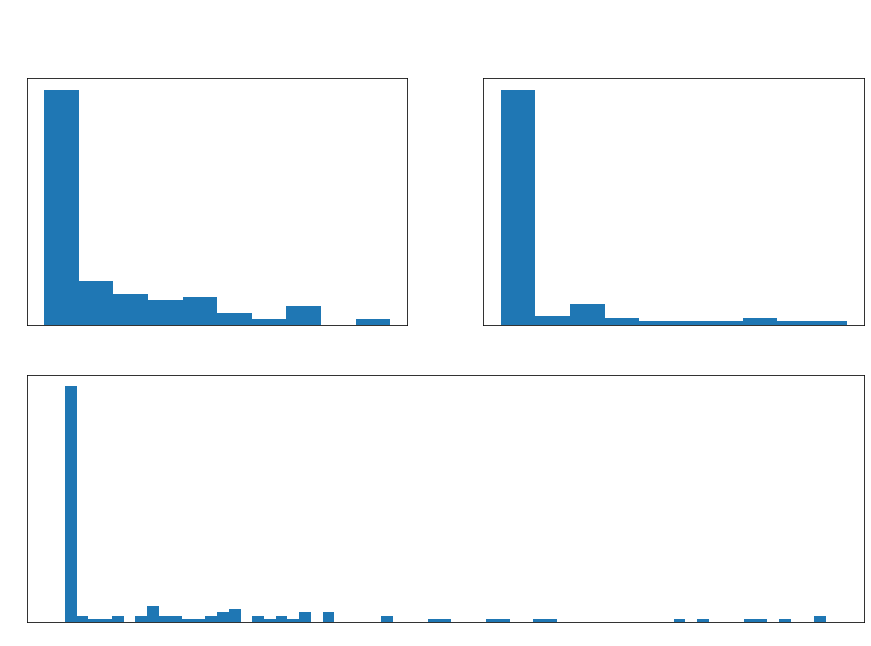

In [7]:
from plotting.mc_simulation.best_model_position.plot import plot_ranks_of_best_model
rank = "TOTAL_rank"
N_experiments, N_runs_per_clusternumber = 65, 10
#TODO CH_rank has best intra but worst inter rank profile -> more research
plot_ranks_of_best_model(df_total, rank, N_experiments, N_runs_per_clusternumber)#, init_routine="random_inside")
    

In [8]:
pd.set_option('display.max_columns', None)
#cols = [ 'param_index', 'll', 'AIC', 'BIC', 'silhouette', 'll_rank', 'AIC_rank', 'BIC_rank',"TOTAL_rank", 'silhouette_rank',"CH_rank", 'identified_cluster', "N_cluster",'True_Cluster_number']
dataset = 30
init_routine = "random_inside"
criterion = "TOTAL_rank"

df_select = df_total.loc[(df_total.dataset == dataset) & (df_total.init_routine == init_routine),:].sort_values(criterion)
#df_select = df_select[df_select.identified_cluster == df_select.identified_cluster.max()]
print(f"best model: {int(df_select.identified_cluster.max())} identified clusters")
df_select.head(10)


best model: 5 identified clusters


,param_index,iter_steps,execution_time,ll,AIC,BIC,MML,silhouette,CH,N_cluster,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,TOTAL_score,TOTAL_rank,Total_score_prop,Total_prop_rank,init_routine,dataset,True_Cluster_number,identified_cluster
0,22,75,1.352957,-319.967510,331.967510,350.343080,338.749662,0.435028,377.280404,3,2,1,1,1,8,1,14,1,0.979633,1,random_inside,30,5,2.0
5,40,135,2.316272,-319.939655,339.939655,370.565605,345.353427,0.418869,292.701250,5,1,2,9,2,9,7,30,2,0.934992,6,random_inside,30,5,3.0
2,36,328,3.410022,-328.039384,344.039384,368.540145,351.468195,0.483068,311.351246,4,9,5,6,11,3,3,37,3,0.935223,3,random_inside,30,5,4.0
3,33,292,2.234441,-328.039418,344.039418,368.540178,351.468228,0.483068,311.351246,4,10,6,7,12,3,2,40,4,0.935222,4,random_inside,30,5,4.0
4,35,304,1.840744,-328.040694,344.040694,368.541455,351.469455,0.483068,311.351246,4,11,7,8,13,3,2,44,5,0.935216,5,random_inside,30,5,4.0
6,19,77,0.501458,-336.099687,344.099687,356.350067,351.176758,0.445240,302.913464,2,19,8,2,7,6,5,47,6,0.925985,7,random_inside,30,5,1.0
1,23,54,1.038958,-330.551549,342.551549,360.927119,347.914368,0.488866,191.079429,3,12,4,4,4,2,22,48,7,0.948162,2,random_inside,30,5,1.0
8,41,500,7.677209,-320.489729,340.489729,371.115679,346.947744,0.365739,257.114699,5,3,3,15,3,14,12,50,8,0.913866,9,random_inside,30,5,5.0
7,15,80,0.509424,-336.099714,344.099714,356.350094,351.176784,0.445240,302.913464,2,20,9,3,8,6,5,51,9,0.925985,8,random_inside,30,5,1.0
9,49,193,3.133234,-324.900814,344.900814,375.526764,351.392483,0.397429,269.851712,5,5,10,21,9,11,10,66,10,0.902998,10,random_inside,30,5,5.0


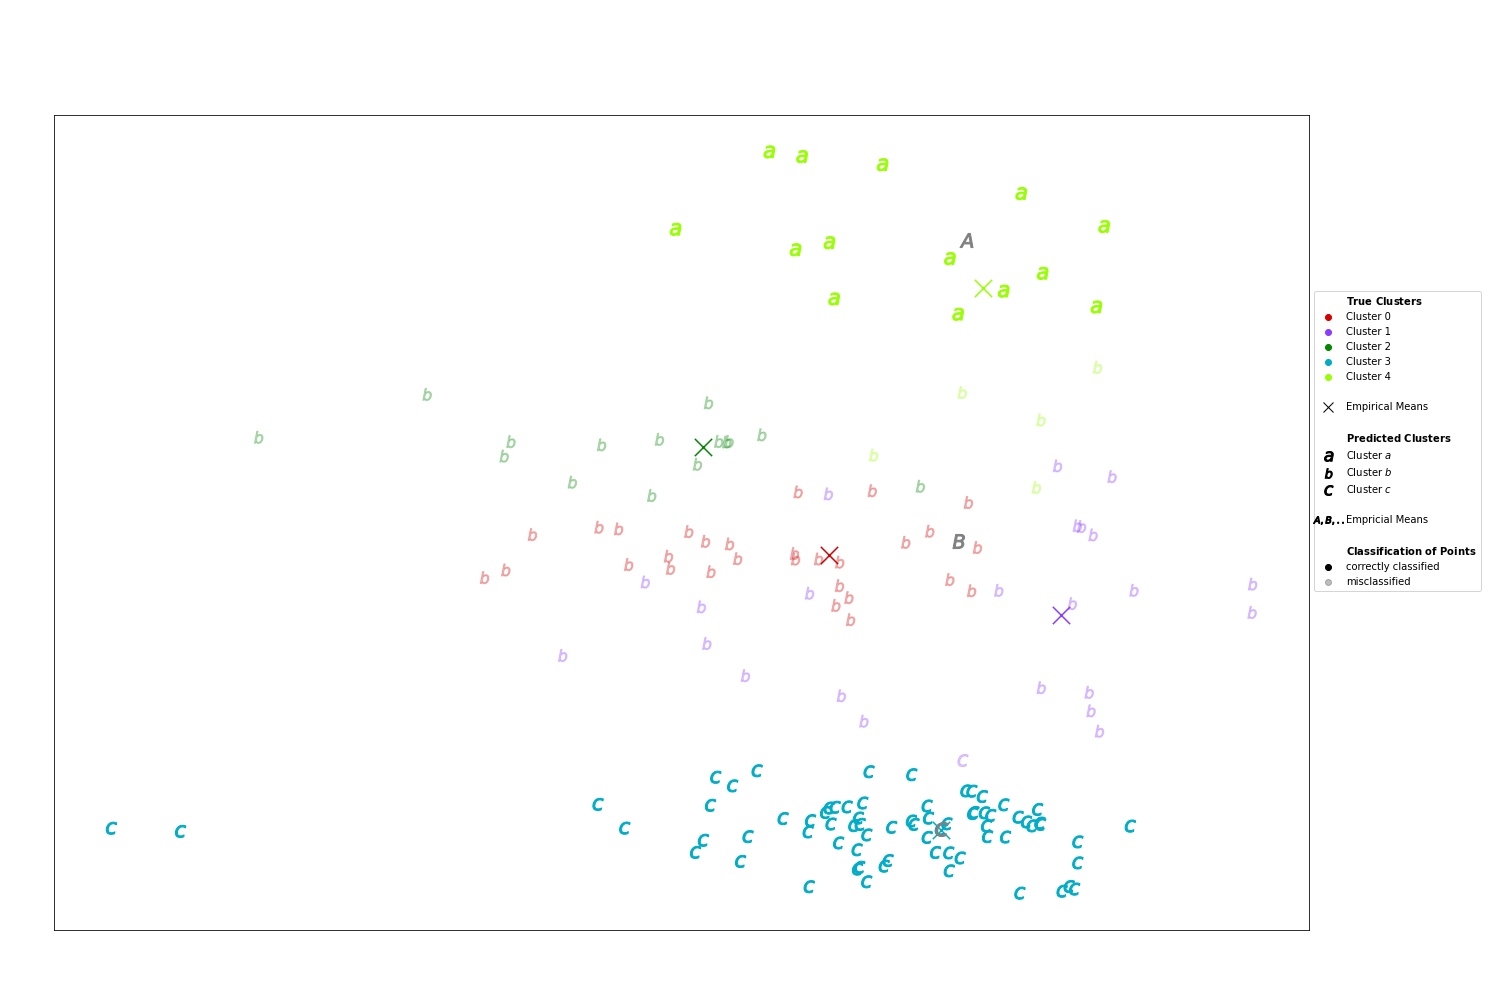

In [9]:
from plotting.clustering_assessment.plot import plot_clustering_assessment
param_idx = 22
#criterion = "TOTAL_rank"

plot_clustering_assessment(run_data, run_results, init_routine, dataset, criterion, param_idx=param_idx)

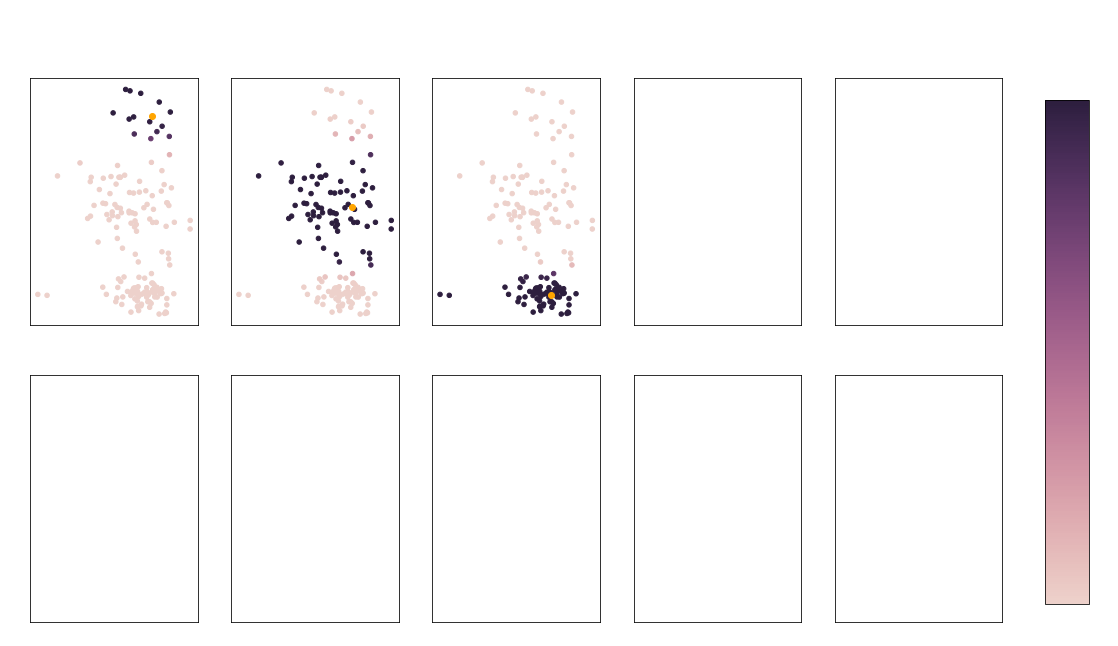

In [10]:
from plotting.plot_funcs import plot_responsibilities

plot_responsibilities(run_data[dataset], run_results[init_routine]["em_results"][dataset][param_idx]) 

In [11]:
pd.set_option('display.max_columns', None)
#cols = [ 'param_index', 'll', 'AIC', 'BIC', 'silhouette', 'll_rank', 'AIC_rank', 'BIC_rank',"TOTAL_rank", 'silhouette_rank',"CH_rank", 'identified_cluster', "N_cluster",'True_Cluster_number']
dataset = 30
init_routine = "random_inside"
criterion = "TOTAL_rank"

df_select = df_total.loc[(df_total.dataset == dataset) & (df_total.init_routine == init_routine),:].sort_values(criterion)
#df_select = df_select[df_select.identified_cluster == df_select.identified_cluster.max()]
print(f"best model: {int(df_select.identified_cluster.max())} identified clusters")
df_select.head(10)

best model: 5 identified clusters


,param_index,iter_steps,execution_time,ll,AIC,BIC,MML,silhouette,CH,N_cluster,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,TOTAL_score,TOTAL_rank,Total_score_prop,Total_prop_rank,init_routine,dataset,True_Cluster_number,identified_cluster
0,22,75,1.352957,-319.967510,331.967510,350.343080,338.749662,0.435028,377.280404,3,2,1,1,1,8,1,14,1,0.979633,1,random_inside,30,5,2.0
5,40,135,2.316272,-319.939655,339.939655,370.565605,345.353427,0.418869,292.701250,5,1,2,9,2,9,7,30,2,0.934992,6,random_inside,30,5,3.0
2,36,328,3.410022,-328.039384,344.039384,368.540145,351.468195,0.483068,311.351246,4,9,5,6,11,3,3,37,3,0.935223,3,random_inside,30,5,4.0
3,33,292,2.234441,-328.039418,344.039418,368.540178,351.468228,0.483068,311.351246,4,10,6,7,12,3,2,40,4,0.935222,4,random_inside,30,5,4.0
4,35,304,1.840744,-328.040694,344.040694,368.541455,351.469455,0.483068,311.351246,4,11,7,8,13,3,2,44,5,0.935216,5,random_inside,30,5,4.0
6,19,77,0.501458,-336.099687,344.099687,356.350067,351.176758,0.445240,302.913464,2,19,8,2,7,6,5,47,6,0.925985,7,random_inside,30,5,1.0
1,23,54,1.038958,-330.551549,342.551549,360.927119,347.914368,0.488866,191.079429,3,12,4,4,4,2,22,48,7,0.948162,2,random_inside,30,5,1.0
8,41,500,7.677209,-320.489729,340.489729,371.115679,346.947744,0.365739,257.114699,5,3,3,15,3,14,12,50,8,0.913866,9,random_inside,30,5,5.0
7,15,80,0.509424,-336.099714,344.099714,356.350094,351.176784,0.445240,302.913464,2,20,9,3,8,6,5,51,9,0.925985,8,random_inside,30,5,1.0
9,49,193,3.133234,-324.900814,344.900814,375.526764,351.392483,0.397429,269.851712,5,5,10,21,9,11,10,66,10,0.902998,10,random_inside,30,5,5.0


In [12]:
def calculate_cluster_params(df):
    df_cl_grouped = df.groupby(["prediction_cluster"]).agg({"x": ["count","mean"], "y": ["mean", "std"]})
    df_cl_grouped.columns = ['_'.join(col).strip() if col[1] else col[0] for col in df_cl_grouped.columns.values]
    df_cl_grouped = df_cl_grouped.reset_index().rename(columns={"x_count": "n_points"})  
    return df_cl_grouped

In [38]:
from post_processing.identfy_clusters import get_prediction_df#, calculate_cluster_params
from data_simulation.simulate_data import Experiment

dataset = 30
init_routine = "random_inside"
param_idx = 22

df_exp = run_data[dataset].df.copy()
X = run_data[dataset].X
params_array = run_results[init_routine]["em_results"][dataset][param_idx]
results = {"params":run_results[init_routine]["em_results"][dataset]}



df = get_prediction_df(df_exp, results, None, param_idx=param_idx)
df = calculate_cluster_params(df)

exp_pb = Experiment().from_parametric_bootstrap(df)

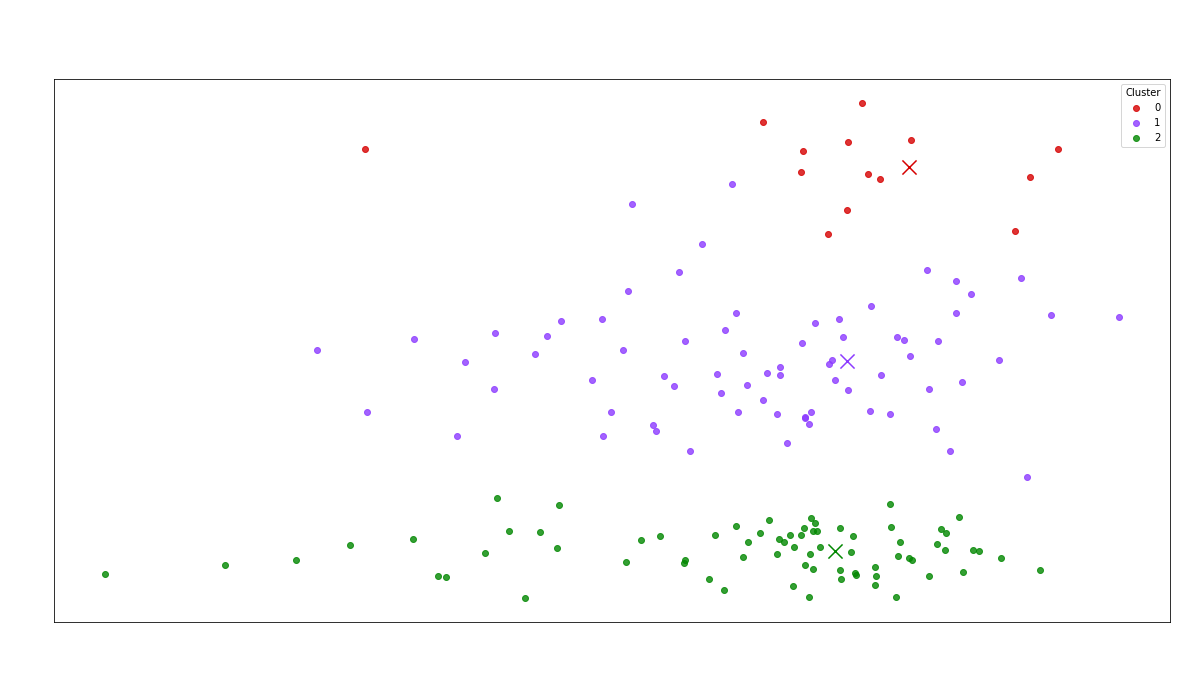

In [39]:
from plotting.plot_funcs import plot_cluster

plot_cluster(exp_pb.df, "cluster", title="True Clusters")

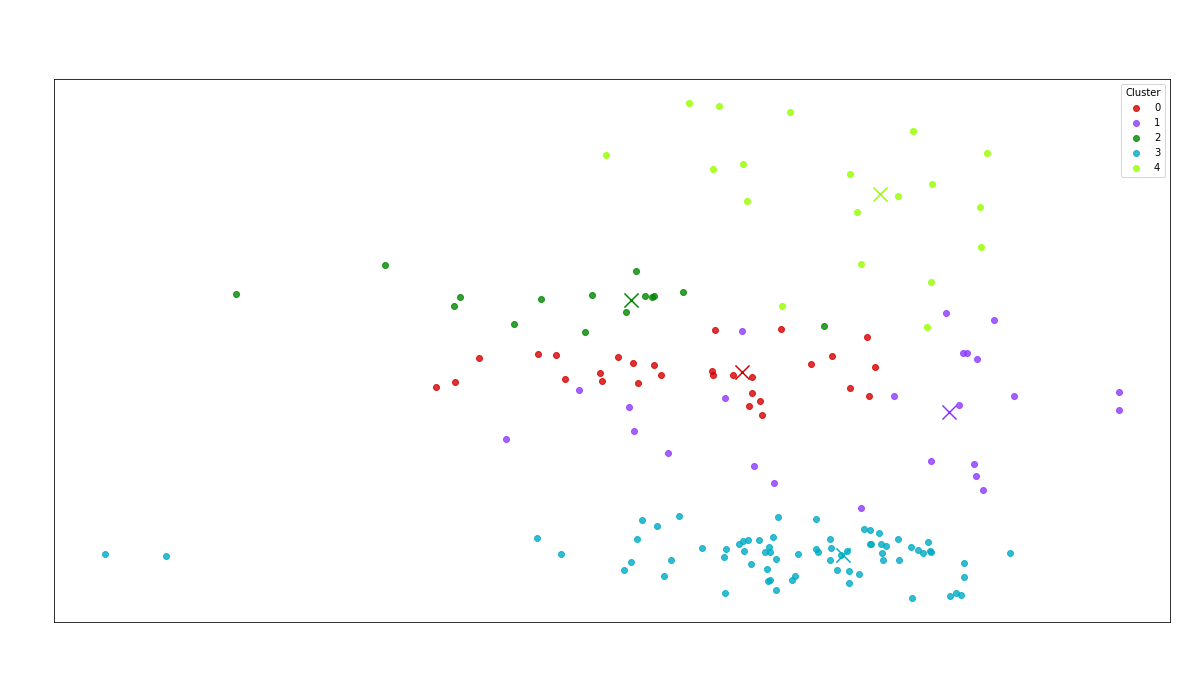

In [17]:
plot_cluster(run_data[dataset].df, "cluster", title="True Clusters")

In [14]:
df.loc[0]

prediction_cluster           0
n_points                    14
x_mean                0.535574
y_mean                7.109209
y_std                 0.601882
Name: 0, dtype: object

In [15]:
for i in range(*(1,2)):
    print(i)

1
